<a href="https://colab.research.google.com/github/hashir5/EDA_on_Customer_Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**" EcodeCamp "  DATA SCIENCE INTERNSHIP**

Task 1:
Exploratory Data Analysis (EDA) on Customer Churn

Subimtted By: Hashir Ubaid

**Data Preprocessing**

In [1]:

# Load the Dataset
import pandas as pd
ds = pd.read_csv("dataset1.csv")

# View first few rows
print(ds.head())
# Information about Dataset
print(ds.info())
print(ds.shape)
print(ds.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Handle Missing Values**

In [2]:

# Check for missing values
print(ds.isnull().sum())

# If the missing values are few, you can drop them
# ds.dropna(inplace=True)

# Alternatively, you can fill missing values with mean/median/mode
# ds.fillna(ds.mean(), inplace=True)  # For numerical columns
# ds.fillna(ds.mode().iloc[0], inplace=True)  # For categorical columns


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
import numpy as np

# Ensure only numeric columns are used for IQR calculation
numeric_columns = ds.select_dtypes(include=[np.number]).columns

# Calculate IQR for numeric columns
Q1 = ds[numeric_columns].quantile(0.25)
Q3 = ds[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
IQR


,0
SeniorCitizen,0.00
tenure,46.00
MonthlyCharges,54.35


In [4]:
# Remove outliers using the IQR method
ds_clean = ds[~((ds[numeric_columns] < (Q1 - 1.5 * IQR)) |
                    (ds[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the cleaned dataset
ds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   int64  
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 
 17  

**Normalize or Standardize Data**

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ds.select_dtypes(include=['float64', 'int64']).columns
ds[numerical_columns] = scaler.fit_transform(ds[numerical_columns])
ds[numerical_columns]

,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365
...,...,...,...
7038,-0.439916,-0.340876,0.665992
7039,-0.439916,1.613701,1.277533
7040,-0.439916,-0.870241,-1.168632
7041,2.273159,-1.155283,0.320338


**Exploratory Data Analysis (EDA)**

In [6]:

# Get basic statistics of the dataset
ds.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.399165e-01,-1.318165e+00,-1.545860e+00
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01
50%,-4.399165e-01,-1.372744e-01,1.857327e-01
75%,-4.399165e-01,9.214551e-01,8.338335e-01
max,2.273159e+00,1.613701e+00,1.794352e+00


**Data Distributions** *italicised text*

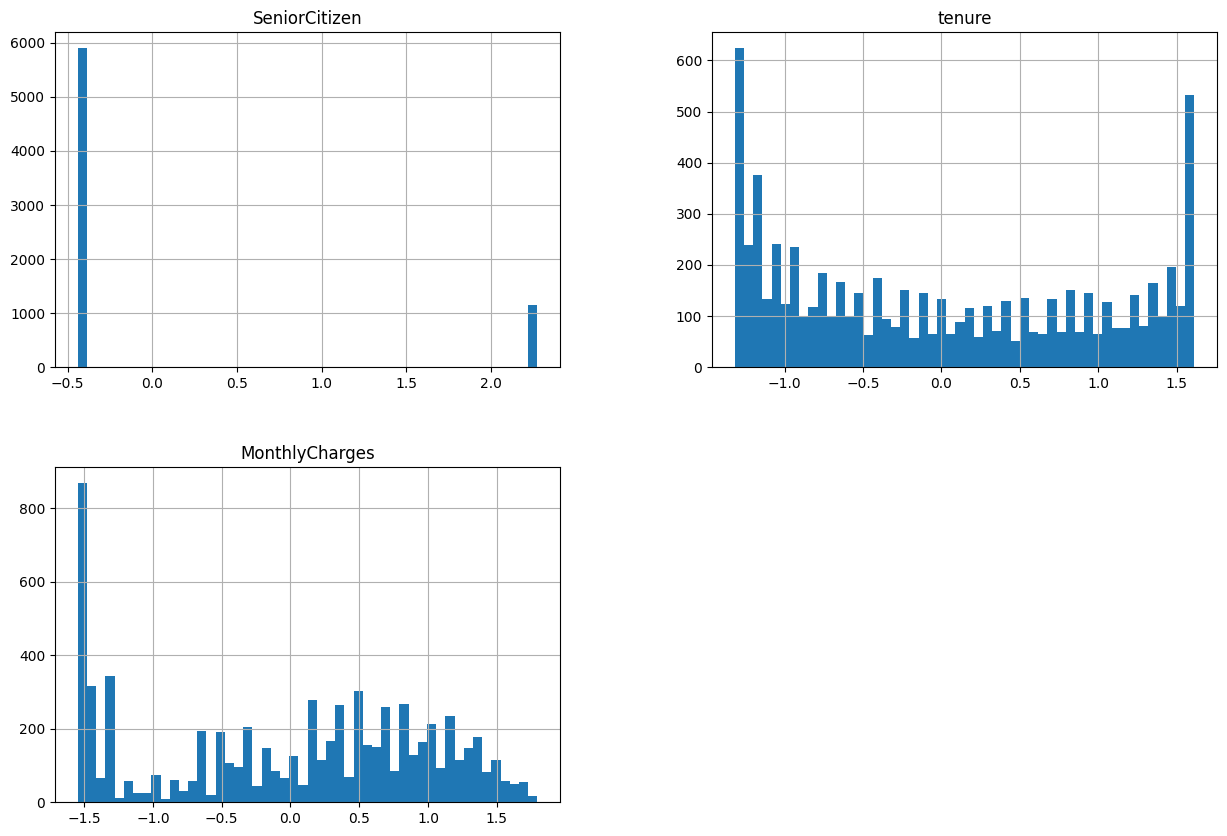

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
ds.hist(bins=50, figsize=(15, 10))
plt.show()


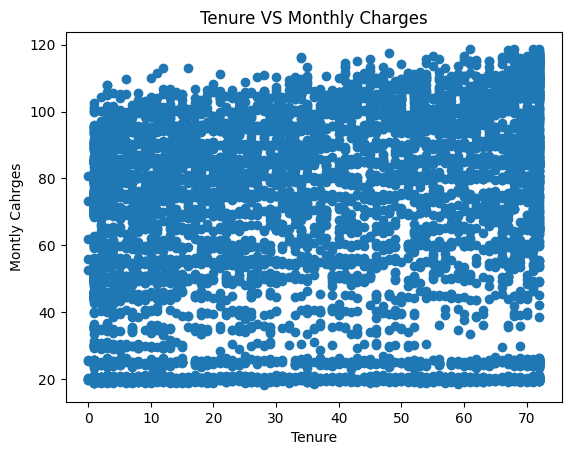

In [62]:
#  Scatter Plots
# Scatter plot between two important features (e.g., 'tenure' vs 'MonthlyCharges')
plt.scatter(ds['tenure'], ds['MonthlyCharges'])
plt.xlabel("Tenure")
plt.ylabel("Montly Cahrges")
plt.title("Tenure VS Monthly Charges")
plt.show()

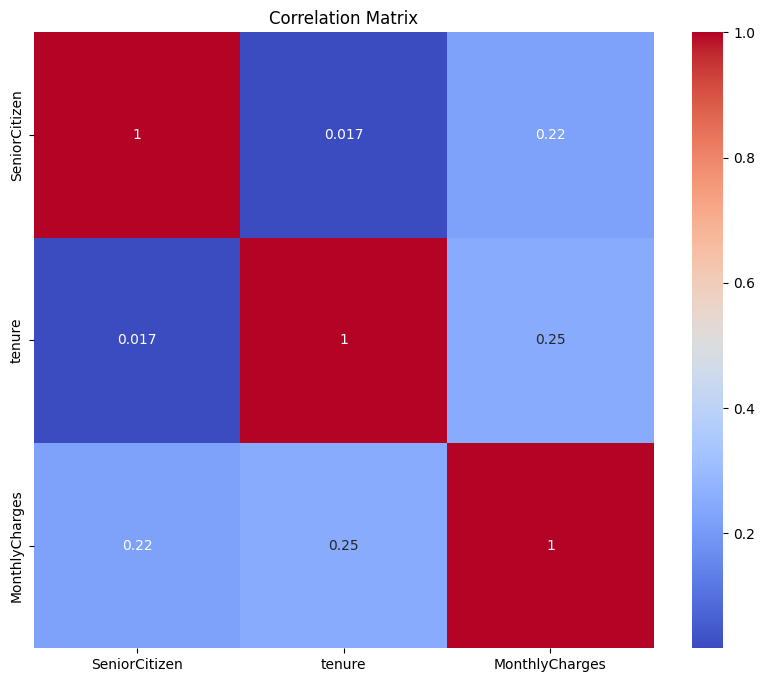

In [8]:
# Correlation Matrix
import seaborn as sns

# plor correlation Matrix
corr_matrix = ds[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Identify Patterns and Predictors of Churn**

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


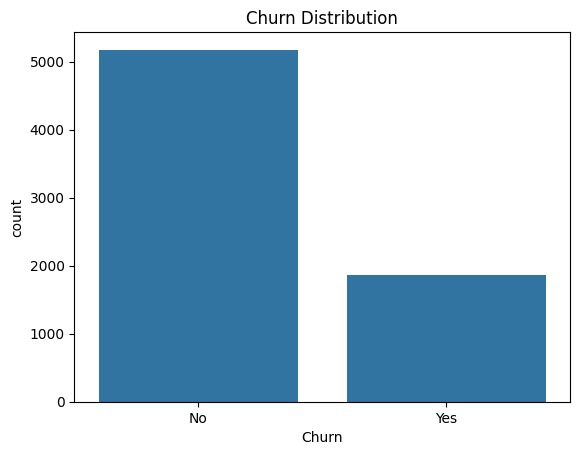

In [20]:
# Check if 'Churn' is a valid column in the dataset
print(ds.columns)  # Print all column names to verify

if 'Churn' in ds.columns:
    # Plot churn distribution
    sns.countplot(x='Churn', data=ds)  # Ensure 'data' parameter is passed correctly
    plt.title('Churn Distribution')
    plt.show()
else:
    print("Column 'Churn' not found in the dataset.")


**Relationships Between Features and Churn:**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


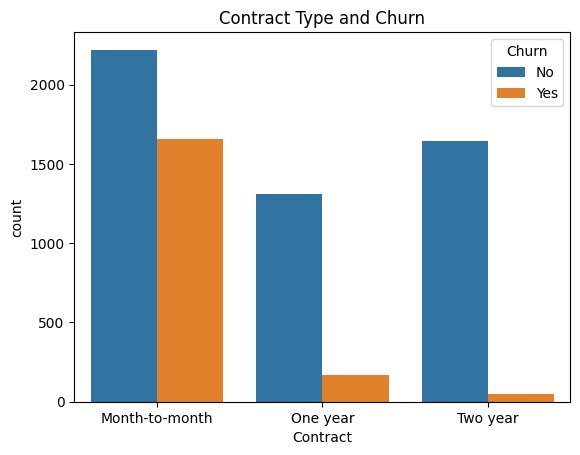

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


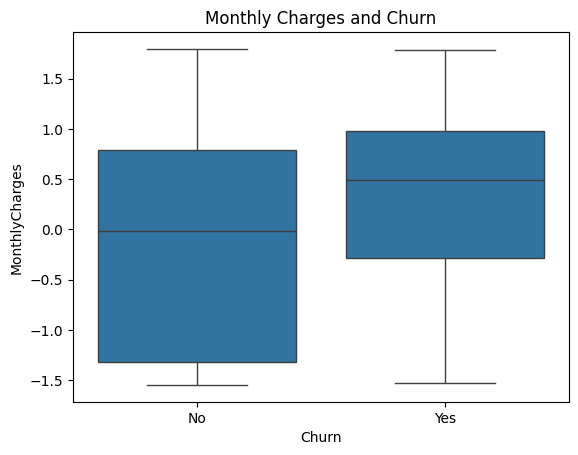

In [19]:
# Bar plot for categorical variables like 'Contract'
sns.countplot(x='Contract', hue='Churn', data=ds)  # Use 'data' instead of 'ds'
plt.title('Contract Type and Churn')
plt.show()

# Box plot for numerical features
sns.boxplot(x='Churn', y='MonthlyCharges', data=ds)  # Use 'data' instead of 'ds'
plt.title('Monthly Charges and Churn')
plt.show()
